In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd 

2024-03-02 18:02:11.489221: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-02 18:02:11.490993: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-02 18:02:11.515911: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 18:02:11.515939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 18:02:11.516587: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

# EDA

## Loading the data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

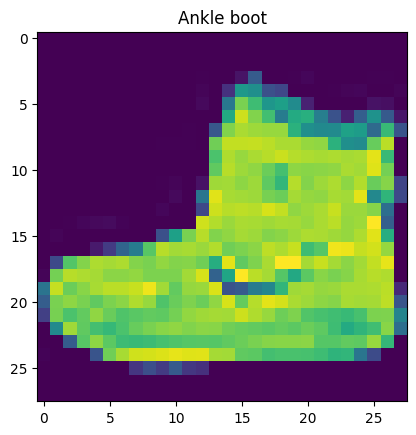

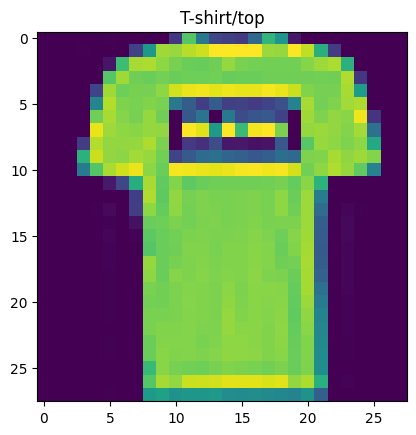

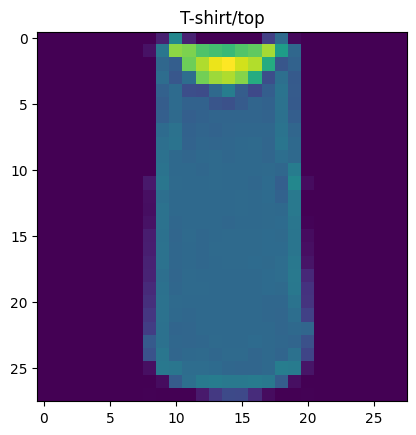

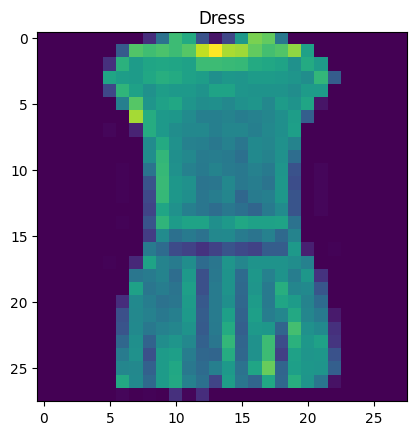

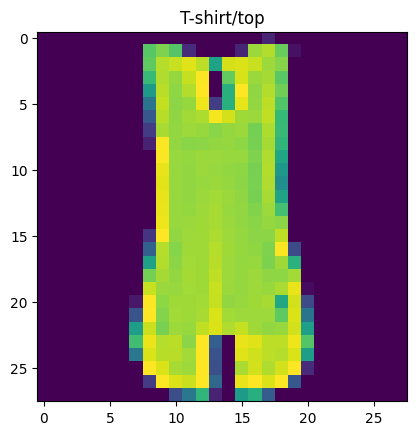

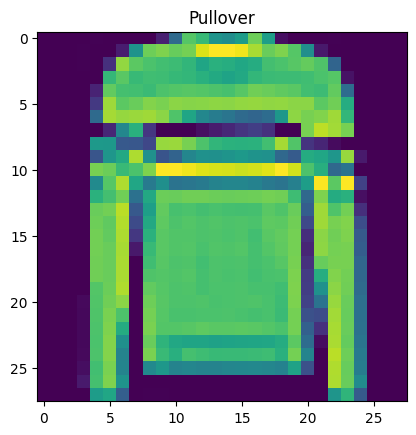

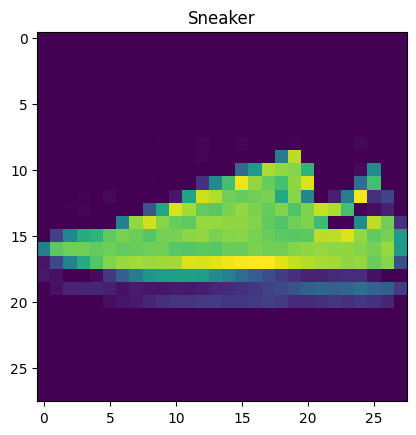

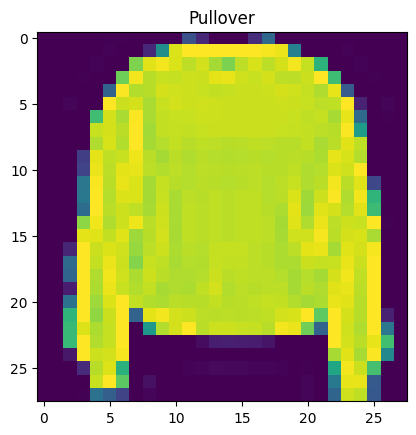

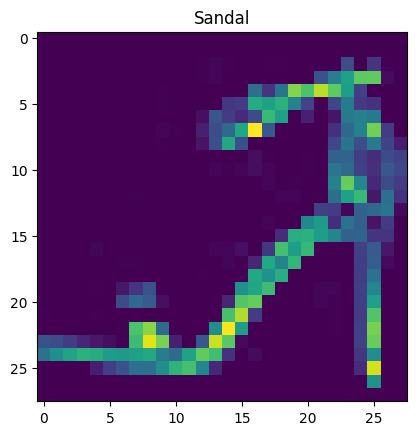

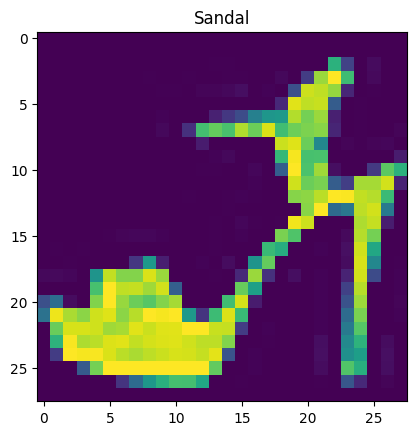

In [5]:
for i in range(10):
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i]])
    plt.colormaps()
    plt.show()

## Normaising the images

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

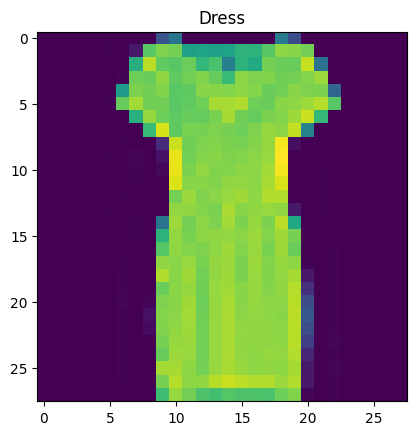

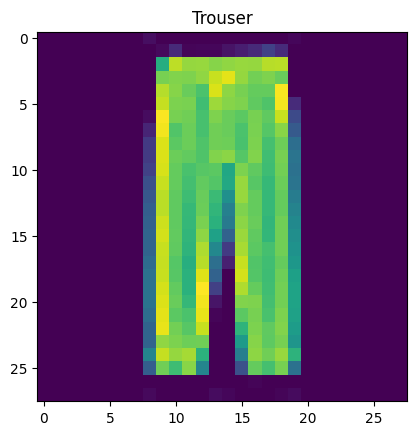

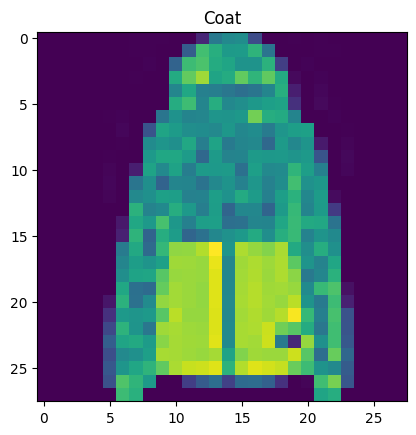

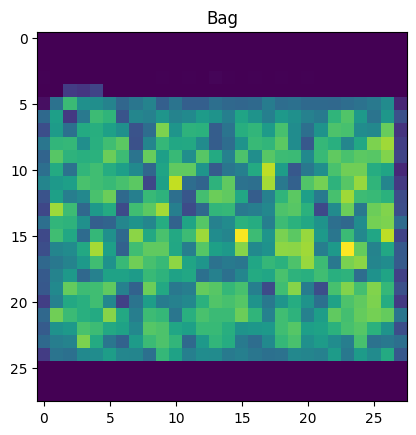

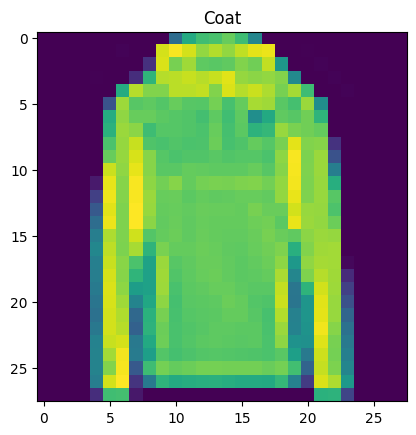

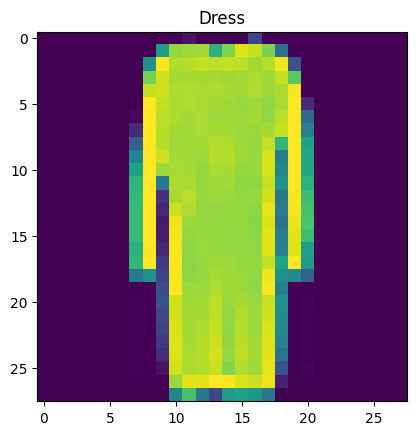

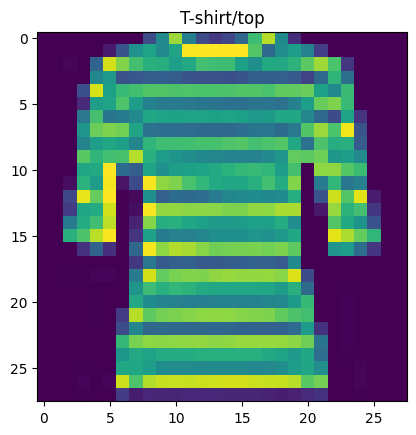

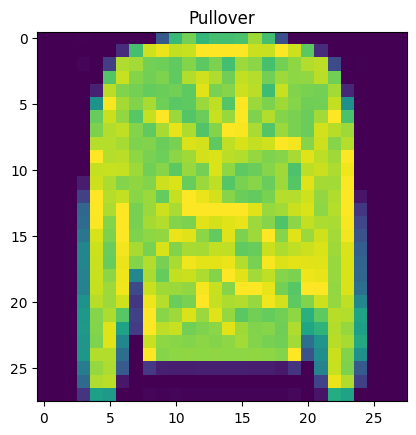

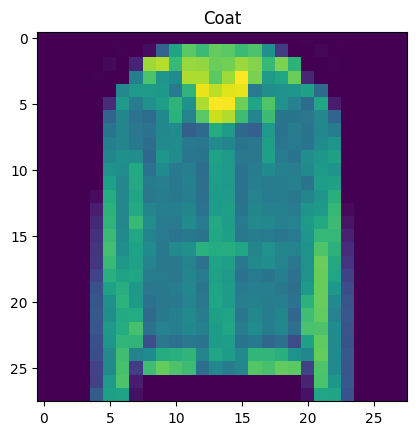

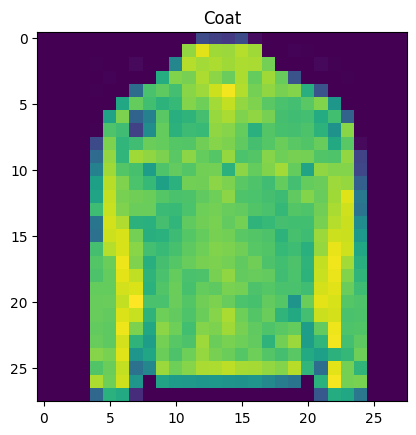

In [7]:
for i in range(20,30):
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i]])
    plt.colormaps()
    plt.show()

# Model

In [34]:
model = tf.keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(32,(3,3),activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,(3,3),activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,(3,3),activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(), 
    keras.layers.Dense(64,activation= "relu"),
    keras.layers.Dense(128,activation= "relu"),
    keras.layers.Dense(64,activation= "relu"),
    keras.layers.Dense(len(class_names) , activation="softmax")
])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 32)         

In [36]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [72]:
hist = model.fit(train_images,train_labels,epochs=16,batch_size = 16,validation_split=0.3)

Epoch 1/16
2625/2625 [==============================] - 7s 3ms/step - loss: 0.1284 - accuracy: 0.9508 - val_loss: 0.4202 - val_accuracy: 0.8955
Epoch 2/16
2625/2625 [==============================] - 8s 3ms/step - loss: 0.1240 - accuracy: 0.9532 - val_loss: 0.4178 - val_accuracy: 0.8972
Epoch 3/16
2625/2625 [==============================] - 8s 3ms/step - loss: 0.1217 - accuracy: 0.9547 - val_loss: 0.4930 - val_accuracy: 0.8884
Epoch 4/16
2625/2625 [==============================] - 7s 3ms/step - loss: 0.1245 - accuracy: 0.9533 - val_loss: 0.4237 - val_accuracy: 0.8984
Epoch 5/16
2625/2625 [==============================] - 7s 3ms/step - loss: 0.1208 - accuracy: 0.9552 - val_loss: 0.4635 - val_accuracy: 0.8961
Epoch 6/16
2625/2625 [==============================] - 8s 3ms/step - loss: 0.1147 - accuracy: 0.9570 - val_loss: 0.4881 - val_accuracy: 0.8934
Epoch 7/16
2625/2625 [==============================] - 7s 3ms/step - loss: 0.1158 - accuracy: 0.9562 - val_loss: 0.4826 - val_accuracy:

In [73]:
hist_df = pd.DataFrame(hist.history)

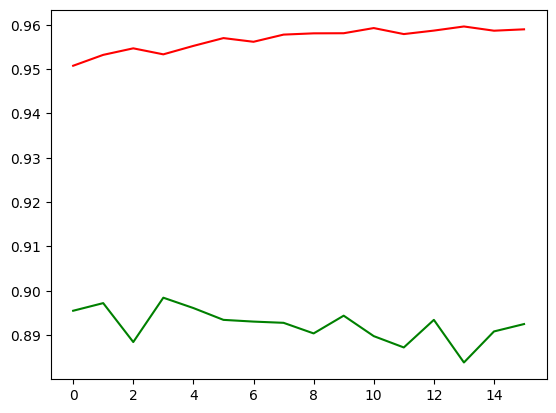

In [74]:
plt.plot(hist_df["accuracy"],color = "r")
plt.plot(hist_df["val_accuracy"],color = "g")
plt.show()

# Model Prediction

In [75]:
y_pred = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [76]:
data = []
for i in y_pred:
    data.append(np.argmax(i))

In [77]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [78]:
data

[9,
 2,
 1,
 1,
 0,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 5,
 3,
 4,
 1,
 2,
 2,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 6,
 9,
 4,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 6,
 1,
 6,
 7,
 4,
 7,
 4,
 1,
 2,
 6,
 4,
 6,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 4,
 7,
 8,
 7,
 0,
 2,
 6,
 4,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 2,
 2,
 3,
 6,
 7,
 6,
 7,
 8,
 5,
 7,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 4,
 7,
 8,
 0,
 0,
 7,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 2,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 2,
 4,
 1,
 3,
 5,
 2,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 4,
 0,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 2,
 1,
 3,
 1,
 4,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 6,
 9,
 2,
 3,
 8,
 6,
 2,
 4,
 2,


In [79]:
model.save("fashion_detector.h")

INFO:tensorflow:Assets written to: fashion_detector.h/assets


INFO:tensorflow:Assets written to: fashion_detector.h/assets


# Model Prediction on a foreign image

In [80]:
import cv2 

In [93]:
image_path = "81MvtqvKsWL._SL1500_.jpg"

In [82]:
model = tf.keras.models.load_model("fashion_detector.h")

In [94]:
img = cv2.imread(image_path)
type(img)

numpy.ndarray

In [95]:
img.shape

(1266, 1500, 3)

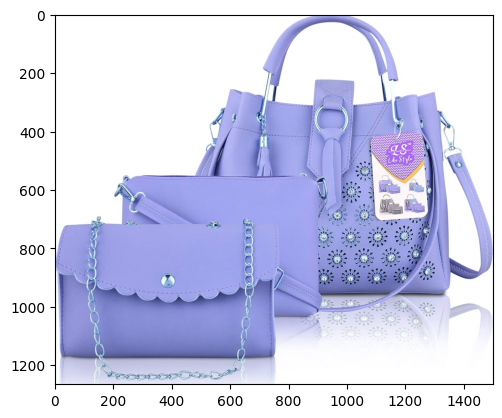

In [96]:
plt.imshow(img)
plt.show()

In [97]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

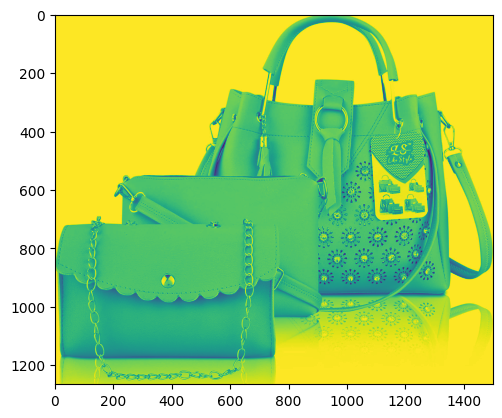

In [98]:
plt.imshow(img)
plt.show()

In [99]:
# img = np.resize(img,(-1,28,28))
img = cv2.resize(img,(28,28))
img = np.expand_dims(img, axis=0)

In [100]:
img.shape

(1, 28, 28)

In [101]:
pred = model.predict(img)

1/1 [==============================] - 0s 12ms/step


In [102]:
loc = np.argmax(pred)

In [103]:
class_names[loc]

'Pullover'

In [104]:
def predic_image_name(image_path):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(28,28))
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    loc = np.argmax(pred)
    return class_names[loc]

In [105]:
predic_image_name(image_path)

1/1 [==============================] - 0s 12ms/step


'Pullover'